In [2]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

In [2]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = './OSM_Data/' # The folder where the Deff csv files are located

ages = ['P14', 'P21', 'P28', 'P35']
slices = 3
vids = 5

for age in ages:
    for slic in range(1, slices+1):
        for vid in range(1, vids+1):
            file_list.append('{}_40nm_s{}_v{}'.format(age, slic, vid))

In [3]:
file_list

['P14_40nm_s1_v1',
 'P14_40nm_s1_v2',
 'P14_40nm_s1_v3',
 'P14_40nm_s1_v4',
 'P14_40nm_s1_v5',
 'P14_40nm_s2_v1',
 'P14_40nm_s2_v2',
 'P14_40nm_s2_v3',
 'P14_40nm_s2_v4',
 'P14_40nm_s2_v5',
 'P14_40nm_s3_v1',
 'P14_40nm_s3_v2',
 'P14_40nm_s3_v3',
 'P14_40nm_s3_v4',
 'P14_40nm_s3_v5',
 'P21_40nm_s1_v1',
 'P21_40nm_s1_v2',
 'P21_40nm_s1_v3',
 'P21_40nm_s1_v4',
 'P21_40nm_s1_v5',
 'P21_40nm_s2_v1',
 'P21_40nm_s2_v2',
 'P21_40nm_s2_v3',
 'P21_40nm_s2_v4',
 'P21_40nm_s2_v5',
 'P21_40nm_s3_v1',
 'P21_40nm_s3_v2',
 'P21_40nm_s3_v3',
 'P21_40nm_s3_v4',
 'P21_40nm_s3_v5',
 'P28_40nm_s1_v1',
 'P28_40nm_s1_v2',
 'P28_40nm_s1_v3',
 'P28_40nm_s1_v4',
 'P28_40nm_s1_v5',
 'P28_40nm_s2_v1',
 'P28_40nm_s2_v2',
 'P28_40nm_s2_v3',
 'P28_40nm_s2_v4',
 'P28_40nm_s2_v5',
 'P28_40nm_s3_v1',
 'P28_40nm_s3_v2',
 'P28_40nm_s3_v3',
 'P28_40nm_s3_v4',
 'P28_40nm_s3_v5',
 'P35_40nm_s1_v1',
 'P35_40nm_s1_v2',
 'P35_40nm_s1_v3',
 'P35_40nm_s1_v4',
 'P35_40nm_s1_v5',
 'P35_40nm_s2_v1',
 'P35_40nm_s2_v2',
 'P35_40nm_s

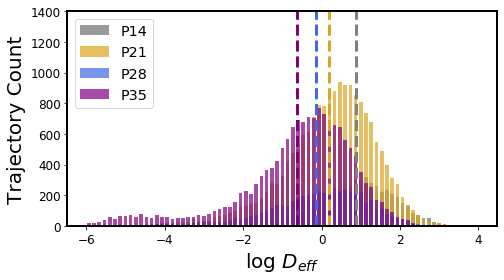

In [10]:
Deff_vals_P14 = pd.DataFrame()

for file in file_list[0:15]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P14 = pd.concat([Deff_vals_P14, temp], ignore_index=True)
Deff_vals_P14.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P14['Deff [um^2/s]'] = 10*Deff_vals_P14['Deff [um^2/s]']

Deff_vals_P21 = pd.DataFrame()
for file in file_list[15:30]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P21 = pd.concat([Deff_vals_P21, temp], ignore_index=True)
Deff_vals_P21.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P21['Deff [um^2/s]'] = 10*Deff_vals_P21['Deff [um^2/s]']

Deff_vals_P28 = pd.DataFrame()
for file in file_list[30:45]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P28 = pd.concat([Deff_vals_P28, temp], ignore_index=True)
Deff_vals_P28.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P28['Deff [um^2/s]'] = 10*Deff_vals_P28['Deff [um^2/s]']

Deff_vals_P35 = pd.DataFrame()
for file in file_list[45:60]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P35 = pd.concat([Deff_vals_P35, temp], ignore_index=True)
Deff_vals_P35.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P35['Deff [um^2/s]'] = 10*Deff_vals_P35['Deff [um^2/s]']

#P14_40_no_nan = P14_40nm.replace(0,np.nan)
#P21_40_no_nan = P21_40nm.replace(0,np.nan)
#P28_40_no_nan = P28_40nm.replace(0,np.nan)
#P35_40_no_nan = P35_40nm.replace(0,np.nan)

#log_Deff_P14_40 = np.log(P14_40_no_nan.dropna())
#log_Deff_P21_40 = np.log(P21_40_no_nan.dropna())
#log_Deff_P28_40 = np.log(P28_40_no_nan.dropna())
#log_Deff_P35_40 = np.log(P35_40_no_nan.dropna())

log_Deff_P14 = np.log(Deff_vals_P14)
log_Deff_P21 = np.log(Deff_vals_P21)
log_Deff_P28 = np.log(Deff_vals_P28)
log_Deff_P35 = np.log(Deff_vals_P35)

test_bins = np.linspace(-6, 4, 76)

P14_hist, P14_bins = np.histogram(log_Deff_P14, bins=test_bins)
P21_hist, P21_bins = np.histogram(log_Deff_P21, bins=test_bins)
P28_hist, P28_bins = np.histogram(log_Deff_P28, bins=test_bins)
P35_hist, P35_bins = np.histogram(log_Deff_P35, bins=test_bins)

P14_avg = np.mean(log_Deff_P14)[0]
P21_avg = np.mean(log_Deff_P21)[0]
P28_avg = np.mean(log_Deff_P28)[0]
P35_avg = np.mean(log_Deff_P35)[0]

plt.rc('axes', linewidth=2)
P14_plot, P21_plot, P28_plot, P35_plot = P14_hist, P21_hist, P28_hist, P35_hist
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, P14_plot, color='grey', align='center', width=width, alpha=0.8, label='P14')
plt.axvline(P14_avg, color='grey', linestyle='--', linewidth=3)
plt.ylim((0,800))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, P21_plot, color='goldenrod', align='center', width=width, alpha=0.7, label='P21')
plt.axvline(P21_avg, color='goldenrod', linestyle='--', linewidth=3)
plt.ylim((0,400))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, P28_plot, color='royalblue', align='center', width=width, alpha=0.7, label='P28')
plt.axvline(P28_avg, color='royalblue', linestyle='--', linewidth=3)
plt.ylim((0,100))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, P35_plot, color='purple', align='center', width=width, alpha=0.7, label='P35')
plt.axvline(P35_avg, color='purple', linestyle='--', linewidth=3)
plt.ylim((0,100))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylim((0,1400))
plt.legend(fontsize='x-large', loc=2)
plt.show()

In [11]:
print(P14_avg, P21_avg, P28_avg, P35_avg)
print(np.exp(P14_avg), np.exp(P21_avg), np.exp(P28_avg), np.exp(P35_avg))

0.8820395503802898 0.19429553256800025 -0.14889712747255734 -0.6268538547859926
2.415821875630063 1.2144551409730384 0.861657751250419 0.5342700507770876


In [26]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/temp_storage/MPT_ECM_Breakdown_Data/csvs/' # The folder where the Deff csv files are located

ages = ['ChABC', 'HYase', 'NT']
brains = 4

for age in ages:
    for brain in range(1, brains+1):
        file_list.append('{}_brain_{}_stats'.format(age, brain))

In [27]:
file_list

['ChABC_brain_1_stats',
 'ChABC_brain_2_stats',
 'ChABC_brain_3_stats',
 'ChABC_brain_4_stats',
 'HYase_brain_1_stats',
 'HYase_brain_2_stats',
 'HYase_brain_3_stats',
 'HYase_brain_4_stats',
 'NT_brain_1_stats',
 'NT_brain_2_stats',
 'NT_brain_3_stats',
 'NT_brain_4_stats']

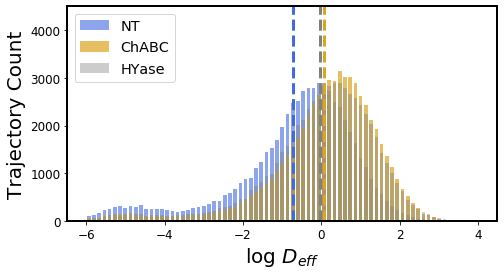

In [34]:
Deff_vals_ChABC = pd.DataFrame()

for file in file_list[0:4]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_ChABC = pd.concat([Deff_vals_ChABC, temp], ignore_index=True)
Deff_vals_ChABC.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)

Deff_vals_HYase = pd.DataFrame()
for file in file_list[4:8]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_HYase = pd.concat([Deff_vals_HYase, temp], ignore_index=True)
Deff_vals_HYase.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)

Deff_vals_NT = pd.DataFrame()
for file in file_list[8:12]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_NT = pd.concat([Deff_vals_NT, temp], ignore_index=True)
Deff_vals_NT.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)


log_Deff_ChABC = np.log(Deff_vals_ChABC)
log_Deff_HYase = np.log(Deff_vals_HYase)
log_Deff_NT = np.log(Deff_vals_NT)

test_bins = np.linspace(-6, 4, 76)

ChABC_hist, ChABC_bins = np.histogram(log_Deff_ChABC, bins=test_bins)
HYase_hist, HYase_bins = np.histogram(log_Deff_HYase, bins=test_bins)
NT_hist, NT_bins = np.histogram(log_Deff_NT, bins=test_bins)

ChABC_avg = np.mean(log_Deff_ChABC)[0]
HYase_avg = np.mean(log_Deff_HYase)[0]
NT_avg = np.mean(log_Deff_NT)[0]

plt.rc('axes', linewidth=2)
ChABC_plot, HYase_plot, NT_plot = ChABC_hist, HYase_hist, NT_hist
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, NT_plot, color='royalblue', align='center', width=width, alpha=0.6, label='NT')
plt.axvline(NT_avg, color='royalblue', linestyle='--', linewidth=3)
plt.ylim((0,800))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, ChABC_plot, color='goldenrod', align='center', width=width, alpha=0.7, label='ChABC')
plt.axvline(ChABC_avg, color='goldenrod', linestyle='--', linewidth=3)
plt.ylim((0,400))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, HYase_plot, color='grey', align='center', width=width, alpha=0.4, label='HYase')
plt.axvline(HYase_avg, color='grey', linestyle='--', linewidth=3)
plt.ylim((0,100))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylim((0,4500))
plt.legend(fontsize='x-large', loc=2)
plt.show()

In [32]:
print(ChABC_avg, HYase_avg, NT_avg)
print(np.exp(ChABC_avg), np.exp(HYase_avg), np.exp(NT_avg))

0.0697511987351961 -0.04556318651472487 -0.719350833196069
1.072241373054693 0.9554592285259496 0.4870683419514455


In [3]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/temp_storage/MPT_ECM_Breakdown_Data/csvs/' # The folder where the Deff csv files are located

NP_sizes = ['40']
trials = 2 # this is the number of vids that were taken per condition (usually corresponding to different locations)
mol_weights = ['low', 'med', 'high']

for MW in mol_weights:
    for size in NP_sizes:
        for num in range(1, trials+1):
            file_list.append('{}MW_{}nm_trial_{}_Deff'.format(MW, size, num))

In [4]:
file_list

['lowMW_40nm_trial_1_Deff',
 'lowMW_40nm_trial_2_Deff',
 'medMW_40nm_trial_1_Deff',
 'medMW_40nm_trial_2_Deff',
 'highMW_40nm_trial_1_Deff',
 'highMW_40nm_trial_2_Deff']

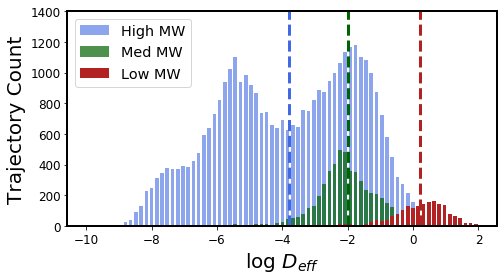

In [10]:
Deff_vals_low = pd.DataFrame()

for file in file_list[0:2]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_low = pd.concat([Deff_vals_low, temp], ignore_index=True)
Deff_vals_low.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)

Deff_vals_med = pd.DataFrame()

for file in file_list[2:4]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_med = pd.concat([Deff_vals_med, temp], ignore_index=True)
Deff_vals_med.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)

Deff_vals_high = pd.DataFrame()

for file in file_list[4:6]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_high = pd.concat([Deff_vals_high, temp], ignore_index=True)
Deff_vals_high.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)

low_no_nan = Deff_vals_low.replace(0,np.nan)
med_no_nan = Deff_vals_med.replace(0,np.nan)
high_no_nan = Deff_vals_high.replace(0,np.nan)

log_Deff_low = np.log(low_no_nan.dropna())
log_Deff_med = np.log(med_no_nan.dropna())
log_Deff_high = np.log(high_no_nan.dropna())

test_bins = np.linspace(-10, 2, 76)

low_hist, low_bins = np.histogram(log_Deff_low, bins=test_bins)
med_hist, med_bins = np.histogram(log_Deff_med, bins=test_bins)
high_hist, high_bins = np.histogram(log_Deff_high, bins=test_bins)

low_avg = np.mean(log_Deff_low)[0]
med_avg = np.mean(log_Deff_med)[0]
high_avg = np.mean(log_Deff_high)[0]

plt.rc('axes', linewidth=2)
low_plot, med_plot, high_plot = low_hist, med_hist, high_hist
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, high_plot, color='royalblue', align='center', width=width, alpha=0.6, label='High MW')
plt.axvline(high_avg, color='royalblue', linestyle='--', linewidth=3)
plt.ylim((0,100))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, med_plot, color='darkgreen', align='center', width=width, alpha=0.7, label='Med MW')
plt.axvline(med_avg, color='darkgreen', linestyle='--', linewidth=3)
plt.ylim((0,400))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(1, figsize=(7,4)).tight_layout()
plt.bar(center, low_plot, color='firebrick', align='center', width=width, alpha=1, label='Low MW')
plt.axvline(low_avg, color='firebrick', linestyle='--', linewidth=3)
plt.ylim((0,800))
plt.xlabel('log $D_{eff}$', fontsize=20)
plt.ylabel('Trajectory Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylim((0,1400))
plt.legend(fontsize='x-large', loc=2)
plt.show()

In [11]:
print(low_avg, med_avg, high_avg)
print(np.exp(low_avg), np.exp(med_avg), np.exp(high_avg))

0.2135300772987697 -1.9869667550360903 -3.79185307089713
1.238040734629163 0.137110685630893 0.022553769370175523
